In [51]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import warnings

In [52]:
df=pd.read_csv('tour_package.csv')
df.head(30)

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0       200000          1  41.0     Self Enquiry         3              6.0   
1       200001          0  49.0  Company Invited         1             14.0   
2       200002          1  37.0     Self Enquiry         1              8.0   
3       200003          0  33.0  Company Invited         1              9.0   
4       200004          0   NaN     Self Enquiry         1              8.0   
5       200005          0  32.0  Company Invited         1              8.0   
6       200006          0  59.0     Self Enquiry         1              9.0   
7       200007          0  30.0     Self Enquiry         1             30.0   
8       200008          0  38.0  Company Invited         1             29.0   
9       200009          0  36.0     Self Enquiry         1             33.0   
10      200010          0  35.0     Self Enquiry         1             22.0   
11      200011          0   NaN     Self Enquiry         1             21.0   
12      200012          0  31.0     Self Enquiry         1             32.0   
13      200013          0  34.0     Self Enquiry         1             25.0   
14      200014          1  28.0     Self Enquiry         1             30.0   
15      200015          0  29.0     Self Enquiry         1             27.0   
16      200016          0  32.0     Self Enquiry         1             11.0   
17      200017          0  22.0  Company Invited         1             22.0   
18      200018          0  53.0     Self Enquiry         3              8.0   
19      200019          0   NaN     Self Enquiry         1              8.0   
20      200020          0   NaN  Company Invited         1             17.0   
21      200021          1   NaN     Self Enquiry         3             15.0   
22      200022          0  34.0     Self Enquiry         1             13.0   
23      200023          0  21.0     Self Enquiry         1             21.0   
24      200024          1  34.0     Self Enquiry         1             12.0   
25      200025          0  53.0     Self Enquiry         1             11.0   
26      200026          1   NaN  Company Invited         1             22.0   
27      200027          0  42.0     Self Enquiry         3             14.0   
28      200028          0  44.0     Self Enquiry         1             13.0   
29      200029          0  46.0     Self Enquiry         3              8.0   

        Occupation   Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0         Salaried   Female                       3                3.0   
1         Salaried     Male                       3                4.0   
2      Free Lancer     Male                       3                4.0   
3         Salaried   Female                       2                3.0   
4   Small Business     Male                       2                3.0   
5         Salaried     Male                       3                3.0   
6   Small Business   Female                       2                2.0   
7         Salaried     Male                       3                3.0   
8         Salaried     Male                       2                4.0   
9   Small Business     Male                       3                3.0   
10  Small Business     Male                       2                2.0   
11        Salaried   Female                       2                4.0   
12        Salaried     Male                       2                3.0   
13  Small Business     Male                       3                3.0   
14        Salaried     Male                       2                4.0   
15        Salaried   Female                       2                2.0   
16        Salaried     Male                       3                2.0   
17  Small Business     Male                       3                2.0   
18        Salaried   Female                       3                4.0   
19        Salaried     Male                       2                3.0   


In [53]:
df.drop(['CustomerID'],axis=1, inplace=True)



In [54]:
df['Gender'] = df['Gender'].replace(['Fe Male'],'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace(['Unmarried'],'Single')


In [55]:
df.head(10)

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0          1  41.0     Self Enquiry         3              6.0   
1          0  49.0  Company Invited         1             14.0   
2          1  37.0     Self Enquiry         1              8.0   
3          0  33.0  Company Invited         1              9.0   
4          0   NaN     Self Enquiry         1              8.0   
5          0  32.0  Company Invited         1              8.0   
6          0  59.0     Self Enquiry         1              9.0   
7          0  30.0     Self Enquiry         1             30.0   
8          0  38.0  Company Invited         1             29.0   
9          0  36.0     Self Enquiry         1             33.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   
5        Salaried    Male                       3                3.0   
6  Small Business  Female                       2                2.0   
7        Salaried    Male                       3                3.0   
8        Salaried    Male                       2                4.0   
9  Small Business    Male                       3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   
5          Basic                    3.0        Single            1.0   
6          Basic                    5.0      Divorced            5.0   
7          Basic                    3.0       Married            2.0   
8       Standard                    3.0        Single            1.0   
9         Deluxe                    3.0      Divorced            7.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   
5         0                       5       1                       1.0   
6         1                       2       1                       1.0   
7         0                       2       0                       1.0   
8         0                       3       0                       0.0   
9         0                       3       1                       0.0   

      Designation  MonthlyIncome  
0         Manager        20993.0  
1         Manager        20130.0  
2       Executive        17090.0  
3       Executive        17909.0  
4       Executive        18468.0  
5       Executive        18068.0  
6       Executive        17670.0  
7       Executive        17693.0  
8  Senior Manager        24526.0  
9         Manager        20237.0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
ProdTaken                   4888 non-null int64
Age                         4662 non-null float64
TypeofContact               4863 non-null object
CityTier                    4888 non-null int64
DurationOfPitch             4637 non-null float64
Occupation                  4888 non-null object
Gender                      4888 non-null object
NumberOfPersonVisiting      4888 non-null int64
NumberOfFollowups           4843 non-null float64
ProductPitched              4888 non-null object
PreferredPropertyStar       4862 non-null float64
MaritalStatus               4888 non-null object
NumberOfTrips               4748 non-null float64
Passport                    4888 non-null int64
PitchSatisfactionScore      4888 non-null int64
OwnCar                      4888 non-null int64
NumberOfChildrenVisiting    4822 non-null float64
Designation                 4888 non-null object
MonthlyInco

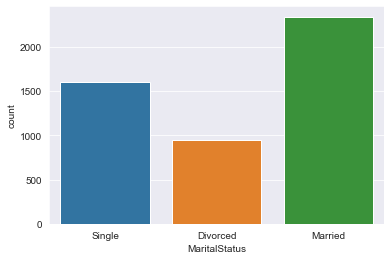

In [57]:
sns.countplot(x='MaritalStatus',data=df)

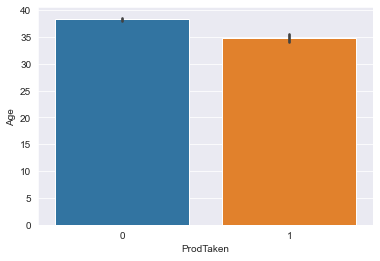

In [58]:
sns.barplot(x='ProdTaken',y='Age',data=df)

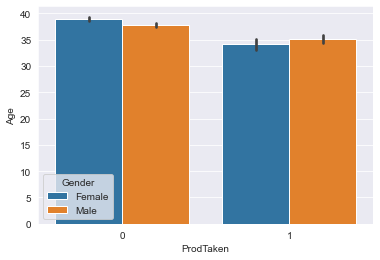

In [59]:
sns.barplot(x='ProdTaken',y='Age',data=df,hue='Gender')

In [60]:
round(100*(pd.isnull(df).sum()/len(df)),2)

ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

In [61]:
def missing_age_treatment(x):
    if pd.isnull(x['Age']):
        return df['Age'][(df['Gender']==x['Gender'])&(df['Passport']==x['Passport'])].median()
    return x['Age']

In [62]:
df['Age']=df[['Age','Passport','Gender']].apply(missing_age_treatment,axis=1)

In [63]:
def missing_age_treatment(x):
    if pd.isnull(x['DurationOfPitch']):
        return df['DurationOfPitch'][(df['Gender']==x['Gender'])&(df['Passport']==x['Passport'])].median()
    return x['DurationOfPitch']
df['DurationOfPitch']=df[['DurationOfPitch','Passport','Gender']].apply(missing_age_treatment,axis=1)

In [64]:
def missing_age_treatment(x):
    if pd.isnull(x['NumberOfTrips']):
        return df['NumberOfTrips'][(df['Gender']==x['Gender'])&(df['Passport']==x['Passport'])].median()
    return x['NumberOfTrips']
df['NumberOfTrips']=df[['NumberOfTrips','Passport','Gender']].apply(missing_age_treatment,axis=1)

In [65]:
def missing_age_treatment(x):
    if pd.isnull(x['MonthlyIncome']):
        return df['MonthlyIncome'][(df['Gender']==x['Gender'])&(df['Passport']==x['Passport'])].median()
    return x['MonthlyIncome']
df['MonthlyIncome']=df[['MonthlyIncome','Passport','Gender']].apply(missing_age_treatment,axis=1)

In [66]:
df.dropna(axis=0,inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 0 to 4887
Data columns (total 19 columns):
ProdTaken                   4726 non-null int64
Age                         4726 non-null float64
TypeofContact               4726 non-null object
CityTier                    4726 non-null int64
DurationOfPitch             4726 non-null float64
Occupation                  4726 non-null object
Gender                      4726 non-null object
NumberOfPersonVisiting      4726 non-null int64
NumberOfFollowups           4726 non-null float64
ProductPitched              4726 non-null object
PreferredPropertyStar       4726 non-null float64
MaritalStatus               4726 non-null object
NumberOfTrips               4726 non-null float64
Passport                    4726 non-null int64
PitchSatisfactionScore      4726 non-null int64
OwnCar                      4726 non-null int64
NumberOfChildrenVisiting    4726 non-null float64
Designation                 4726 non-null object
MonthlyInco

In [68]:
df=pd.concat([df, pd.get_dummies(df['Gender'])],axis=1)


In [69]:
df=pd.concat([df, pd.get_dummies(df['Designation'])],axis=1)


In [70]:
df=pd.concat([df, pd.get_dummies(df['ProductPitched'])],axis=1)

In [71]:
df=pd.concat([df, pd.get_dummies(df['TypeofContact'])],axis=1)

In [72]:
df=pd.concat([df, pd.get_dummies(df['CityTier'])],axis=1)

In [73]:
df=pd.concat([df, pd.get_dummies(df['Occupation'])],axis=1)

In [74]:
df=pd.concat([df, pd.get_dummies(df['MaritalStatus'])],axis=1)

In [75]:
df.drop(['Gender','Designation','ProductPitched','TypeofContact','CityTier','Occupation','MaritalStatus'],axis=1,inplace=True)

In [76]:
df.head()

ProdTaken   Age  DurationOfPitch  NumberOfPersonVisiting  \
0          1  41.0              6.0                       3   
1          0  49.0             14.0                       3   
2          1  37.0              8.0                       3   
3          0  33.0              9.0                       2   
4          0  36.0              8.0                       2   

   NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
0                3.0                    3.0            1.0         1   
1                4.0                    4.0            2.0         0   
2                4.0                    3.0            7.0         1   
3                3.0                    3.0            2.0         1   
4                3.0                    4.0            1.0         0   

   PitchSatisfactionScore  OwnCar   ...    1  2  3  Free Lancer  \
0                       2       1   ...    0  0  1            0   
1                       3       1   ...    1  0  0            0   
2                       3       0   ...    1  0  0            1   
3                       5       1   ...    1  0  0            0   
4                       5       1   ...    1  0  0            0   

   Large Business  Salaried  Small Business  Divorced  Married  Single  
0               0         1               0         0        0       1  
1               0         1               0         1        0       0  
2               0         0               0         0        0       1  
3               0         1               0         1        0       0  
4               0         0               1         1        0       0  

[5 rows x 36 columns]

In [77]:
df.isnull().sum()

ProdTaken                   0
Age                         0
DurationOfPitch             0
NumberOfPersonVisiting      0
NumberOfFollowups           0
PreferredPropertyStar       0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
MonthlyIncome               0
Female                      0
Male                        0
AVP                         0
Executive                   0
Manager                     0
Senior Manager              0
VP                          0
Basic                       0
Deluxe                      0
King                        0
Standard                    0
Super Deluxe                0
Company Invited             0
Self Enquiry                0
1                           0
2                           0
3                           0
Free Lancer                 0
Large Business              0
Salaried                    0
Small Business              0
Divorced  

In [78]:
df.columns


Index([               'ProdTaken',                      'Age',
                'DurationOfPitch',   'NumberOfPersonVisiting',
              'NumberOfFollowups',    'PreferredPropertyStar',
                  'NumberOfTrips',                 'Passport',
         'PitchSatisfactionScore',                   'OwnCar',
       'NumberOfChildrenVisiting',            'MonthlyIncome',
                         'Female',                     'Male',
                            'AVP',                'Executive',
                        'Manager',           'Senior Manager',
                             'VP',                    'Basic',
                         'Deluxe',                     'King',
                       'Standard',             'Super Deluxe',
                'Company Invited',             'Self Enquiry',
                                1,                          2,
                                3,              'Free Lancer',
                 'Large Business',                 'Sal

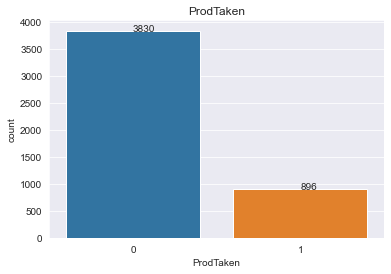

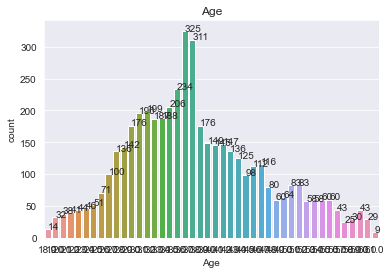

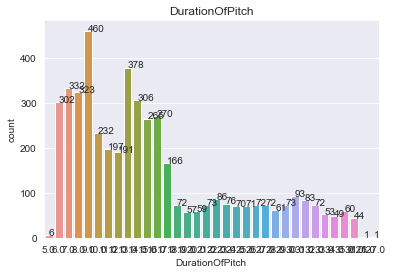

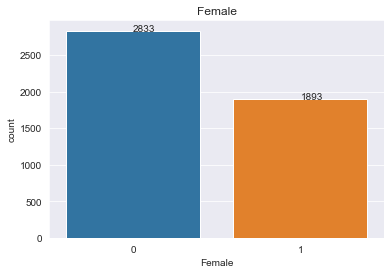

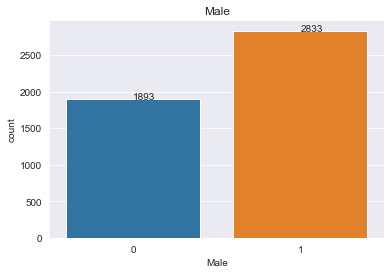

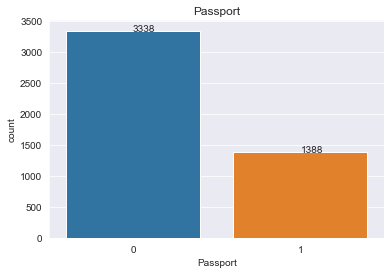

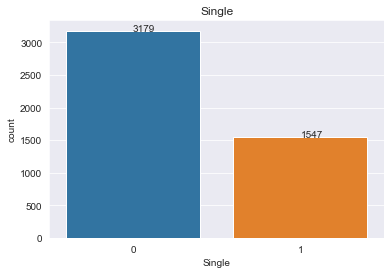

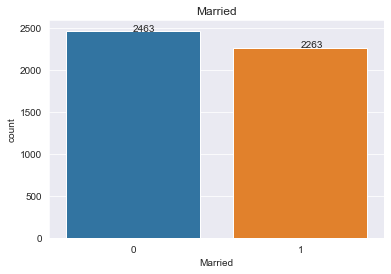

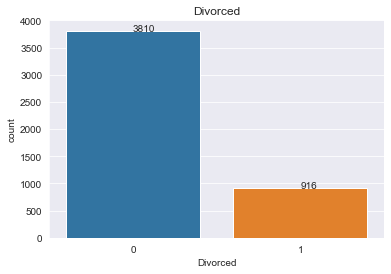

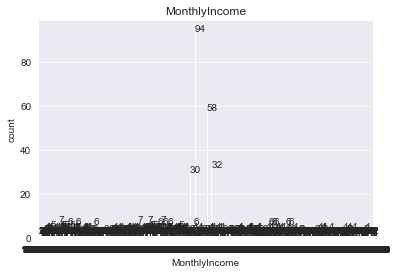

In [79]:
for col in ['ProdTaken','Age','DurationOfPitch','Female','Male','Passport','Single','Married','Divorced','MonthlyIncome']:
    f = sns.countplot(x=col,data=df,)
    plt.title(col)
    for i in f.patches:
        x = i.get_x() + i.get_width()/2
        y = i.get_y() + i.get_height()    
        plt.annotate(i.get_height(),(x,y))
    plt.show()

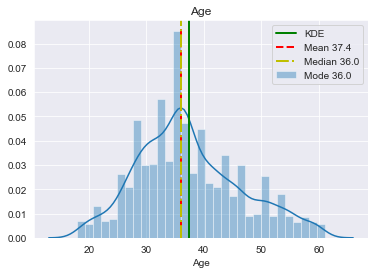

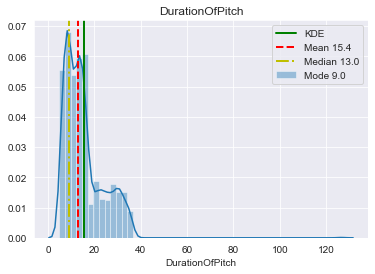

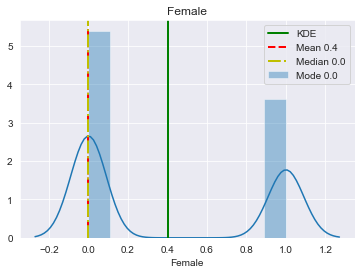

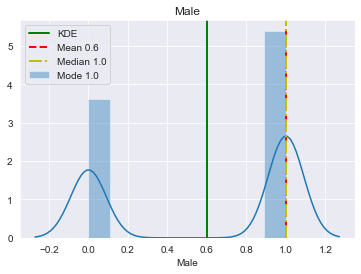

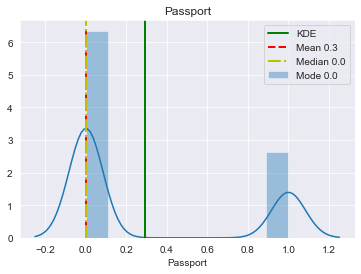

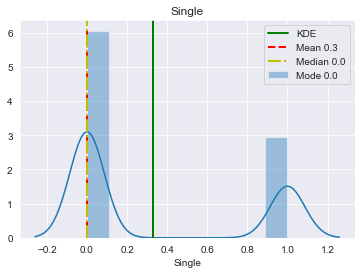

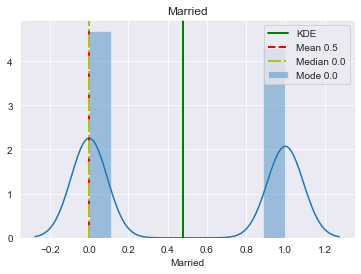

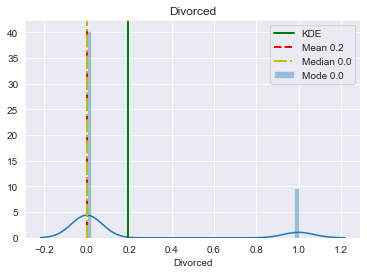

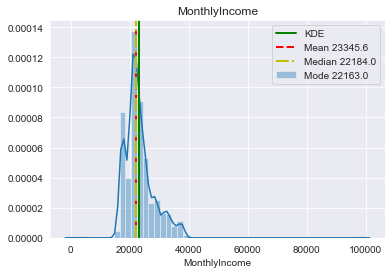

In [80]:
for col in ['Age','DurationOfPitch','Female','Male','Passport','Single','Married','Divorced','MonthlyIncome']:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    sns.distplot(df[col])
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.title(col)
    plt.show()

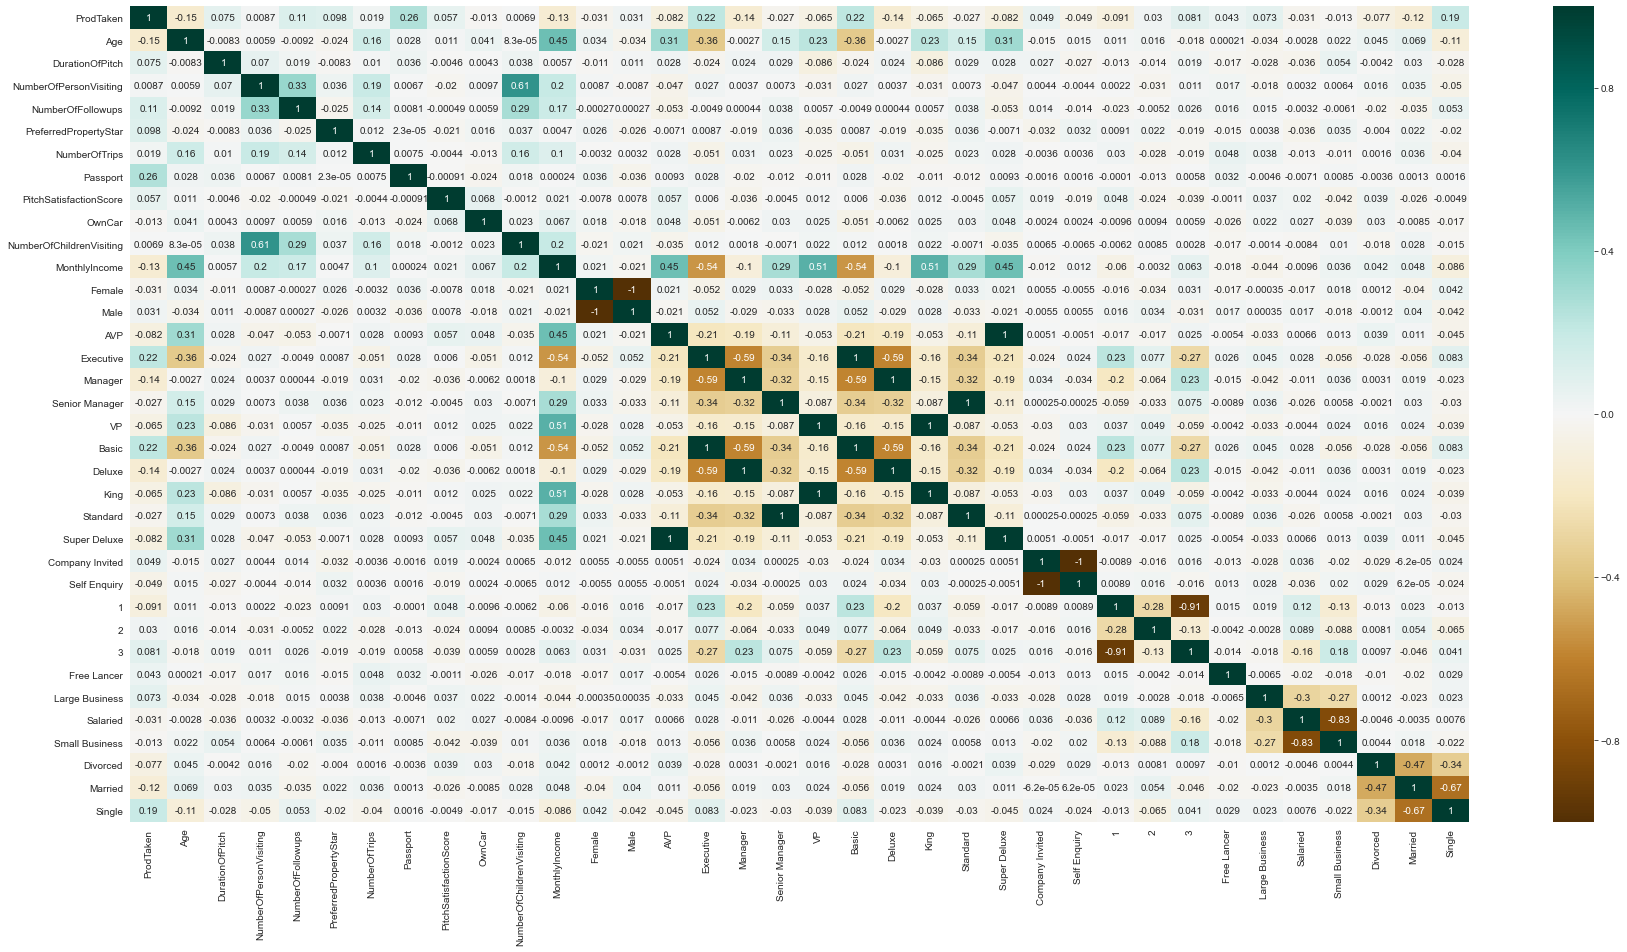

In [81]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

In [82]:
df.columns


Index([               'ProdTaken',                      'Age',
                'DurationOfPitch',   'NumberOfPersonVisiting',
              'NumberOfFollowups',    'PreferredPropertyStar',
                  'NumberOfTrips',                 'Passport',
         'PitchSatisfactionScore',                   'OwnCar',
       'NumberOfChildrenVisiting',            'MonthlyIncome',
                         'Female',                     'Male',
                            'AVP',                'Executive',
                        'Manager',           'Senior Manager',
                             'VP',                    'Basic',
                         'Deluxe',                     'King',
                       'Standard',             'Super Deluxe',
                'Company Invited',             'Self Enquiry',
                                1,                          2,
                                3,              'Free Lancer',
                 'Large Business',                 'Sal

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x = df[['DurationOfPitch','Passport','Single','Married','Divorced','MonthlyIncome','Basic','Company Invited','Free Lancer','NumberOfFollowups']]
y = df['ProdTaken']

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
def create_models(x,y, ccp=0):
    global pp
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=10)
    model_dt = DecisionTreeClassifier(ccp_alpha=ccp).fit(xtrain,ytrain)
    model_rf = RandomForestClassifier().fit(xtrain,ytrain)
    
    pp = model_dt.cost_complexity_pruning_path(xtrain,ytrain)
    print('Decision Tree')
    print('-'*20)
    print('Training Score:',model_dt.score(xtrain,ytrain))
    print('Testing Score:',model_dt.score(xtest,ytest))
    
    print()
    print('Random Forest')
    print('-'*20)
    print('Training Score:',model_rf.score(xtrain,ytrain))
    print('Testing Score:',model_rf.score(xtest,ytest))
    
    return model_dt,model_rf,pp

In [96]:
model_dt, model_rf,pp = create_models(x,y)

Decision Tree
--------------------
Training Score: 0.9988713318284425
Testing Score: 0.8688663282571912

Random Forest
--------------------
Training Score: 0.9988713318284425
Testing Score: 0.8722504230118443


In [97]:
ccp_alpha, ccp_imp = pp.ccp_alphas, pp.impurities

In [98]:
len(ccp_imp)
import numpy as np

Text(0, 0.5, 'Total Impurities of Leaves')

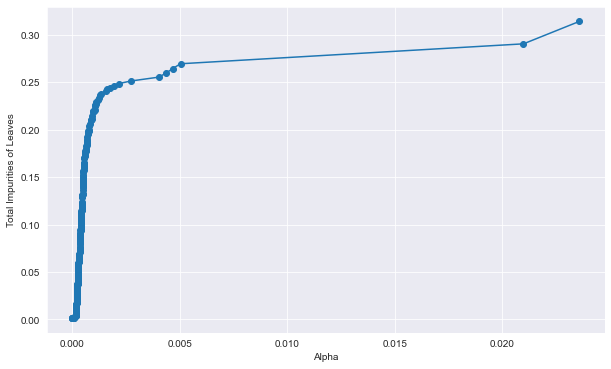

In [99]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ccp_alpha,ccp_imp,marker='o')
plt.xlabel('Alpha')
plt.ylabel('Total Impurities of Leaves')

In [100]:
ccp_alpha.sort()
opt_ccp_alpha=ccp_alpha[-4]

In [101]:
model_dt1=create_models(x,y,opt_ccp_alpha)

Decision Tree
--------------------
Training Score: 0.8270316027088036
Testing Score: 0.8240270727580372

Random Forest
--------------------
Training Score: 0.998589164785553
Testing Score: 0.8688663282571912


<b> conclusion: Lets use this model,because the accuracy score is more than 90 % </b>

In [93]:
final_model=model_rf

In [94]:
pd.to_pickle(final_model,'TourPackagePrediction')
import pickle
with open('TourPackagePrediction.pkl','wb') as f:
    pickle.dump(final_model,f)